In [1]:
import sys,os
sys.path.append(os.path.abspath('../src/')) # para importar nbpil
try:
    sys.imagepath.append(os.path.abspath('../data/')) # caminho para imagens
except:
    sys.imagepath = [os.path.abspath('../data/')]
sys.imagepath.append(os.path.abspath('../../../datasets/ia898/'))
import numpy as np

import nbpil

In [42]:
from cStringIO import StringIO
from IPython.display import display, Image, HTML
import base64
import cv2
import numpy as np
import PIL # from PIL import Image
def nbshow_grid(flist, title=None, fmt='png'):
    imagesList = "<table border=\"0\"><tr>"
    #imagesList = "<table><tr>"
    for a in flist:
        if a.dtype == bool:
            a = np.uint8(a) * 255
        elif a.dtype != np.uint8:
            raise ValueError('Accept only bool ou uint8 image. It was %s' % a.dtype) 
        f = StringIO()
        fi = PIL.Image.fromarray(a)
        fi.save(f, fmt)
        #display(Image(data=f.getvalue()))
        if title:
            print(title)

        ret, imgbuffer = cv2.imencode('.png', a)   # img: numpy array
        img_b64 = base64.b64encode(imgbuffer)
        imagesList +="<td><img src='data:image/png;base64,%s'/></td>" % (img_b64,)
    imagesList +="</tr></table>"
    print 'imagelist:',imagesList
    display(HTML(imagesList))



imagelist: <table border="0"><tr><td></td><td></td></tr></table>

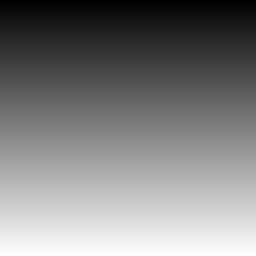
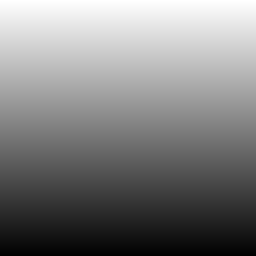

,

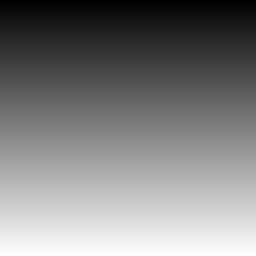
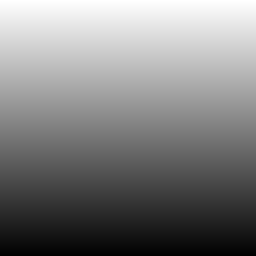

In [43]:
#a1 = nbpil.nbread('cameraman.tif')
#a2 = nbpil.nbread('boat.tif')
a1 = (np.arange(256).reshape((256,1)) * np.ones((1,256))).astype(np.uint8)
a2 = a1[::-1,:]
#nbpil.nbshow(a2)
nbshow_grid([a1,a2])

In [50]:
display(HTML("<head>\
<style>\
table, th, td {\
    border: 10px solid black;\
}\
</style>\
</head>\
<body><table border=\"0\"><tr><td>1</td><td>2</td></tr></table></body>"))

1,2
